# MNIST digit classification with and without hidden layers


In this notebook you will use the Mnist dataset for a classification task. You will compare a the performace of a fully connected neural network with and without hidden layers.

**Usage:** The idea of the notebook is that you try to understand the provided code by running it, checking the output and playing with it by slightly changing the code and rerunning it. 

**Dataset:** You work with the MNIST dataset. We have 60'000 28x28 pixel greyscale images of digits and want to classify them into the right label (0-9).

**Content:**
* load the original MNIST data 
* visualize samples of the data
* flatten the data
* use keras to train a fcNN with  and without hidden layers and compare the perfomance on new unseen test data






#### Imports

In the next two cells, we load all the required libraries and functions. We download the Mnist data, normalize the pixelvalues to be between 0 and 1, and seperate it into a training and validation set.

In [1]:
# load required libraries:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
from sklearn.metrics import confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten , Activation
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras import optimizers






#### Loading and preparing the MNIST data

In [2]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# separate x_train in X_train and X_val, same for y_train
X_train=x_train[0:50000] / 255 #divide by 255 so that they are in range 0 to 1
Y_train=to_categorical(y_train[0:50000],10) # one-hot encoding

X_val=x_train[50000:60000] / 255
Y_val=to_categorical(y_train[50000:60000],10)

X_test=x_test / 255
Y_test=to_categorical(y_test,10)

del x_train, y_train, x_test, y_test

X_train=np.reshape(X_train, (X_train.shape[0],28,28,1))
X_val=np.reshape(X_val, (X_val.shape[0],28,28,1))
X_test=np.reshape(X_test, (X_test.shape[0],28,28,1))

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(50000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)


Let's visualize the first 4 mnist images before shuffling the pixels randomly around. It is very easy to recognise the true label of the digits.

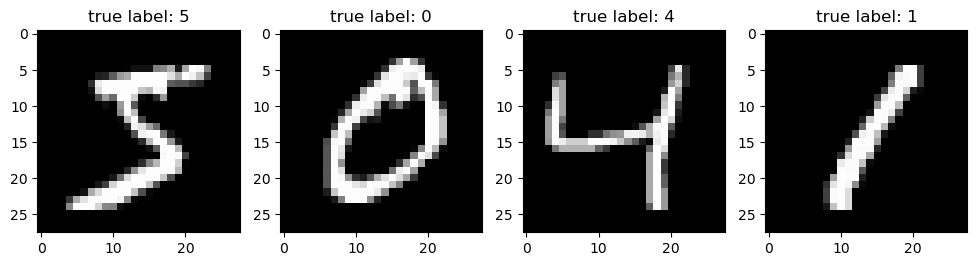

In [3]:
# visualize the 4 first mnist images before shuffling the pixels
plt.figure(figsize=(12,12))
for i in range(0,4):
    plt.subplot(1,4,(i+1))
    plt.imshow((X_train[i,:,:,0]),cmap="gray")
    plt.title('true label: '+np.str(np.argmax(Y_train,axis=1)[i]))
    #plt.axis('off')

## fcNN as classification model for MNIST data
Now we want to train a fcNN to classify the MNIST data. We use the same netwok architecture and train first with the original data and then with the shuffled data. 
* Use a fcNN with 2 hidden layers as classification model.
* train it once on the original train data and check the performance on the original test data
* train it once on the shuffeled train data and check the performance on the accordingly shuffled test data

Because we will use fcNN we need to flatten our inuput into a 1d vector. We do this in the next cell with reshape.

In [4]:
# prepare data for fcNN - we need a vector as input

# first do it for original data
X_train_flat = X_train.reshape([X_train.shape[0], 784])
X_val_flat = X_val.reshape([X_val.shape[0], 784])
X_test_flat = X_test.reshape([X_test.shape[0], 784])



### Train the fcNN on the data

In [5]:
# check the shape
X_train_flat.shape,Y_train.shape,X_val_flat.shape,Y_val.shape

((50000, 784), (50000, 10), (10000, 784), (10000, 10))

Here we define the nework, we use two hidden layers with 100 and 50 nodes. In the output we predict the probability for the 10 digits with the softmax actication function, in the hidden layers we use the sigmoid activation function. 

In [6]:
# define fcNN with 2 hidden layers
model = Sequential()

model.add(Dense(10, batch_input_shape=(None, 784),activation="softmax"))

# compile model and intitialize weights
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [7]:
# summarize model along with number of model weights
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [8]:
# train the model
history=model.fit(X_train_flat, Y_train, 
                  batch_size=128, 
                  epochs=10,
                  verbose=2, 
                  validation_data=(X_val_flat, Y_val)
                 )

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 - 2s - loss: 0.7393 - accuracy: 0.8189 - val_loss: 0.3929 - val_accuracy: 0.9023
Epoch 2/10
50000/50000 - 1s - loss: 0.3866 - accuracy: 0.8967 - val_loss: 0.3220 - val_accuracy: 0.9142
Epoch 3/10
50000/50000 - 1s - loss: 0.3365 - accuracy: 0.9070 - val_loss: 0.2985 - val_accuracy: 0.9180
Epoch 4/10
50000/50000 - 1s - loss: 0.3128 - accuracy: 0.9138 - val_loss: 0.2851 - val_accuracy: 0.9230
Epoch 5/10
50000/50000 - 1s - loss: 0.2993 - accuracy: 0.9169 - val_loss: 0.2762 - val_accuracy: 0.9238
Epoch 6/10
50000/50000 - 1s - loss: 0.2898 - accuracy: 0.9183 - val_loss: 0.2714 - val_accuracy: 0.9264
Epoch 7/10
50000/50000 - 1s - loss: 0.2829 - accuracy: 0.9215 - val_loss: 0.2654 - val_accuracy: 0.9271
Epoch 8/10
50000/50000 - 1s - loss: 0.2777 - accuracy: 0.9221 - val_loss: 0.2623 - val_accuracy: 0.9277
Epoch 9/10
50000/50000 - 1s - loss: 0.2732 - accuracy: 0.9233 - val_loss: 0.2615 - val_accuracy: 0.9296
Epoch 10/10
50

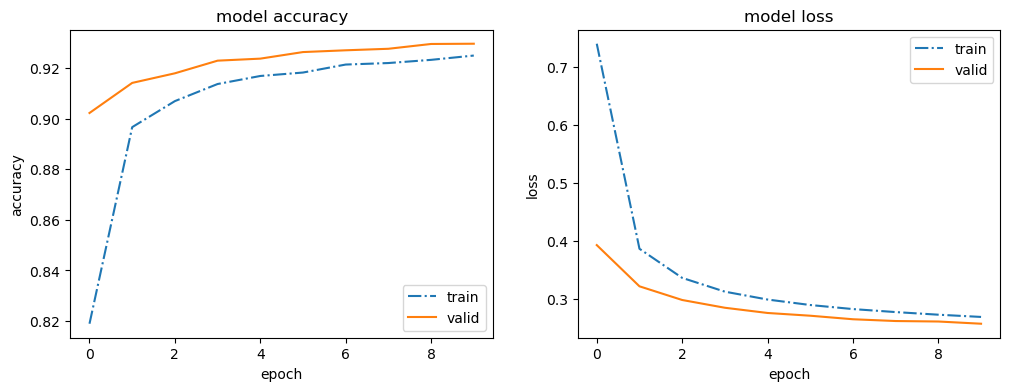

In [9]:
# plot the development of the accuracy and loss during training
plt.figure(figsize=(12,4))
plt.subplot(1,2,(1))
plt.plot(history.history['accuracy'],linestyle='-.')
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(1,2,(2))
plt.plot(history.history['loss'],linestyle='-.')
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

#### Prediction on the original test set after training on original data

Now, let's use the fcNN that was trained on the original data to predict new unseen data (our testdata).
We determine the confusion matrix and the accuracy on the testdata to evaluate the classification performance.


In [10]:
pred=model.predict(X_test_flat)
print(confusion_matrix(np.argmax(Y_test,axis=1),np.argmax(pred,axis=1)))
acc_fc_orig = np.sum(np.argmax(Y_test,axis=1)==np.argmax(pred,axis=1))/len(pred)
print("Acc_fc_orig_flat = " , acc_fc_orig)

[[ 957    0    1    1    0    5   10    3    3    0]
 [   0 1114    3    2    0    1    4    2    9    0]
 [   6   10  922   15   10    4   11   10   39    5]
 [   2    0   19  920    0   27    2   11   21    8]
 [   1    1    4    1  917    0   11    3   10   34]
 [   8    3    4   30    8  775   18    5   33    8]
 [   7    3    5    1    7   10  921    2    2    0]
 [   1    6   23    7    7    0    0  949    2   33]
 [   4    8    7   19    9   24   10   11  874    8]
 [  10    7    1   11   28    8    0   26    7  911]]
Acc_fc_orig_flat =  0.926


In [11]:
# define fcNN with 2 hidden layers
model = Sequential()

model.add(Dense(10, batch_input_shape=(None, 784)))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

# compile model and intitialize weights
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [12]:
# summarize model along with number of model weights
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
activation (Activation)      (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                550       
_________________________________________________________________
activation_1 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 8,910
Trainable params: 8,910
Non-trainable params: 0
____________________________________________________

In [13]:
# train the model
history=model.fit(X_train_flat, Y_train, 
                  batch_size=128, 
                  epochs=30,
                  verbose=2, 
                  validation_data=(X_val_flat, Y_val)
                 )

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 - 2s - loss: 1.8901 - accuracy: 0.4842 - val_loss: 1.3259 - val_accuracy: 0.7504
Epoch 2/30
50000/50000 - 1s - loss: 0.9711 - accuracy: 0.8066 - val_loss: 0.6746 - val_accuracy: 0.8646
Epoch 3/30
50000/50000 - 1s - loss: 0.5752 - accuracy: 0.8660 - val_loss: 0.4642 - val_accuracy: 0.8907
Epoch 4/30
50000/50000 - 1s - loss: 0.4410 - accuracy: 0.8854 - val_loss: 0.3801 - val_accuracy: 0.9004
Epoch 5/30
50000/50000 - 1s - loss: 0.3794 - accuracy: 0.8964 - val_loss: 0.3368 - val_accuracy: 0.9105
Epoch 6/30
50000/50000 - 1s - loss: 0.3420 - accuracy: 0.9050 - val_loss: 0.3090 - val_accuracy: 0.9149
Epoch 7/30
50000/50000 - 1s - loss: 0.3157 - accuracy: 0.9117 - val_loss: 0.2866 - val_accuracy: 0.9203
Epoch 8/30
50000/50000 - 1s - loss: 0.2964 - accuracy: 0.9166 - val_loss: 0.2719 - val_accuracy: 0.9248
Epoch 9/30
50000/50000 - 1s - loss: 0.2810 - accuracy: 0.9197 - val_loss: 0.2623 - val_accuracy: 0.9255
Epoch 10/30
50

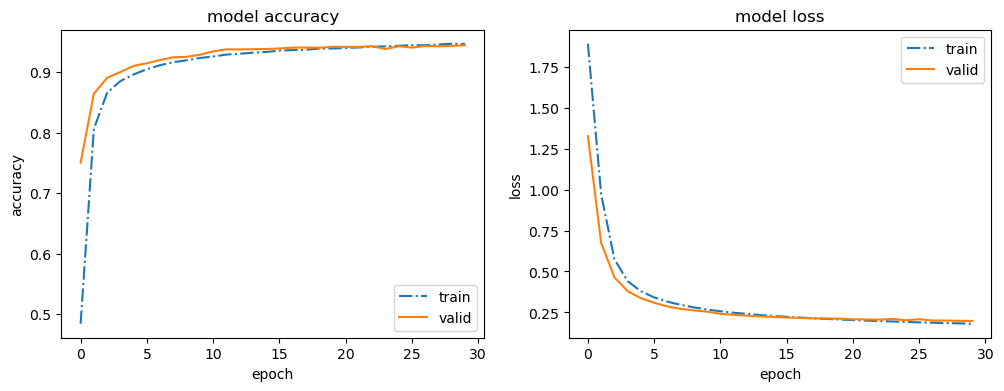

In [14]:
# plot the development of the accuracy and loss during training
plt.figure(figsize=(12,4))
plt.subplot(1,2,(1))
plt.plot(history.history['accuracy'],linestyle='-.')
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(1,2,(2))
plt.plot(history.history['loss'],linestyle='-.')
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

In [15]:
pred=model.predict(X_test_flat)
print(confusion_matrix(np.argmax(Y_test,axis=1),np.argmax(pred,axis=1)))
acc_fc_orig = np.sum(np.argmax(Y_test,axis=1)==np.argmax(pred,axis=1))/len(pred)
print("Acc_fc_orig_flat = " , acc_fc_orig)

[[ 955    0    2    1    0    7    6    3    5    1]
 [   0 1114    2    4    0    2    5    2    6    0]
 [   9    6  951   18    5    1   15    9   18    0]
 [   3    2   15  922    3   29    3   13   16    4]
 [   4    2    6    0  930    2   11    3    3   21]
 [  10    1    3   20    4  804   12    6   26    6]
 [  12    4    5    0    6   12  916    0    3    0]
 [   3   10   22    7    2    0    0  957    1   26]
 [   2    8    5   17    4   16    6    5  906    5]
 [   6    4    0    7   27   11    0   17    9  928]]
Acc_fc_orig_flat =  0.9383


#### Play the deep learning game and ‘stack more layers and change the activation function from sigmoid to relu

Exercise [optional]: Try to improve the fcNN by adding more hidden layers and/or changing the activation function from "sigmoid" to "relu". What do you observe? 
